In [3]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict

from xgboost import XGBClassifier


In [4]:
url = (r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

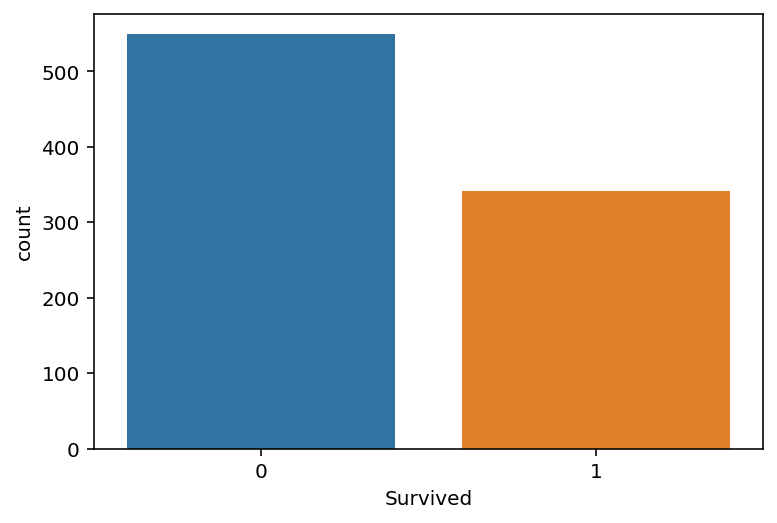

In [7]:
sns.countplot(titanic['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

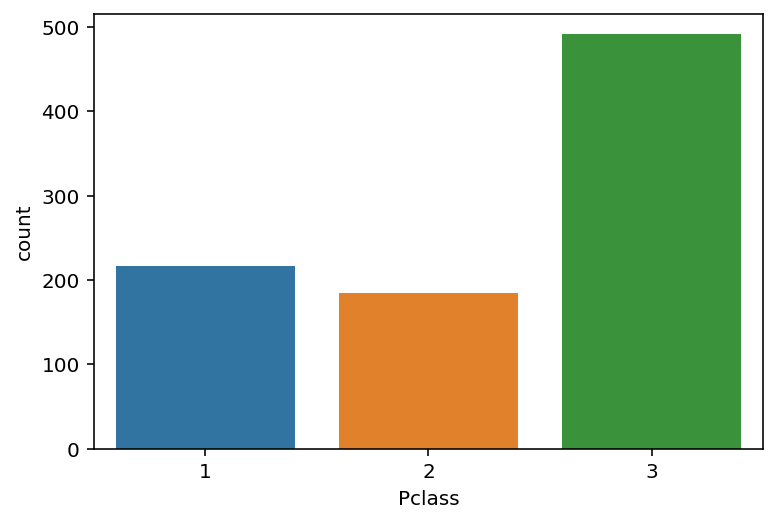

In [8]:
sns.countplot(titanic['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

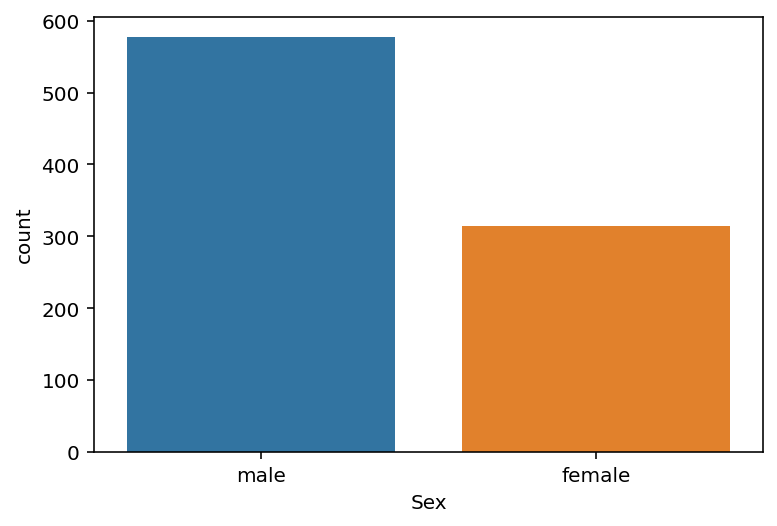

In [9]:
sns.countplot(titanic['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

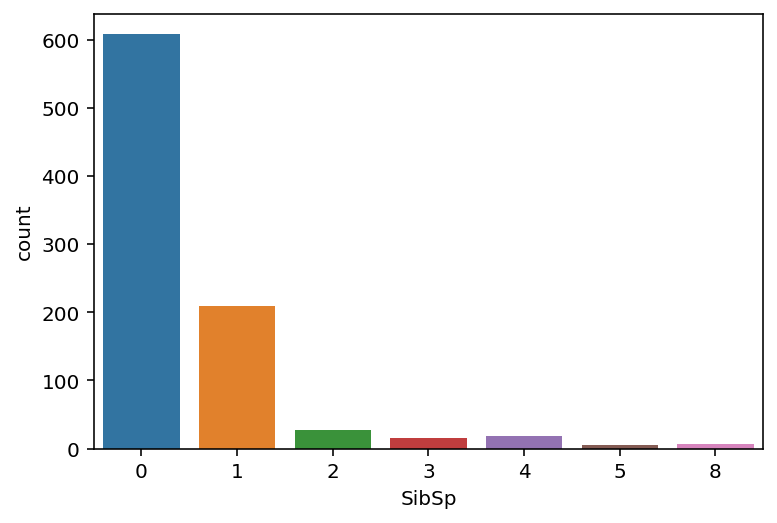

In [10]:
sns.countplot(titanic['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

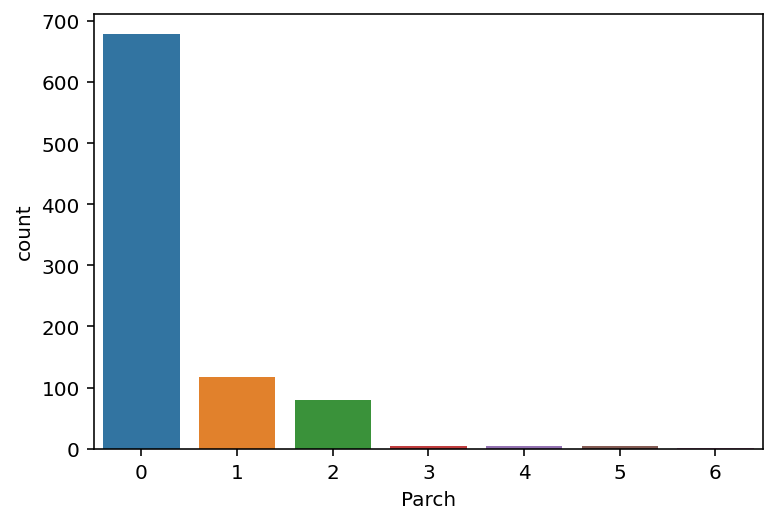

In [11]:
sns.countplot(titanic['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

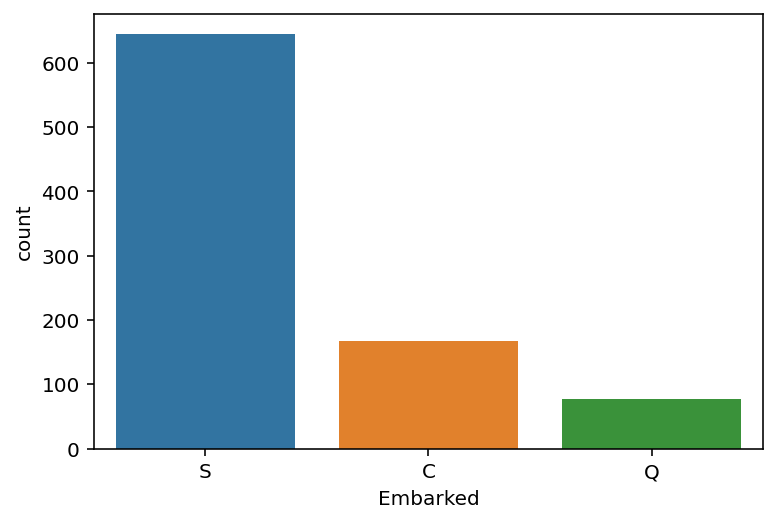

In [12]:
sns.countplot(titanic['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

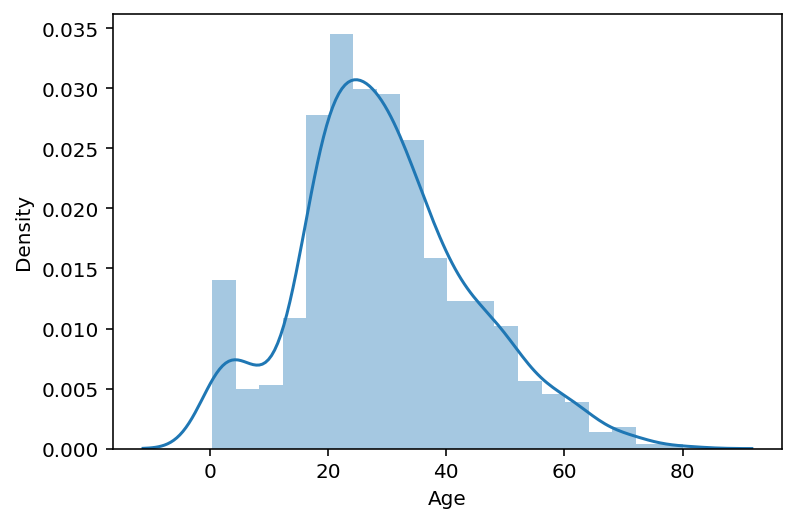

In [13]:
sns.distplot(titanic['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

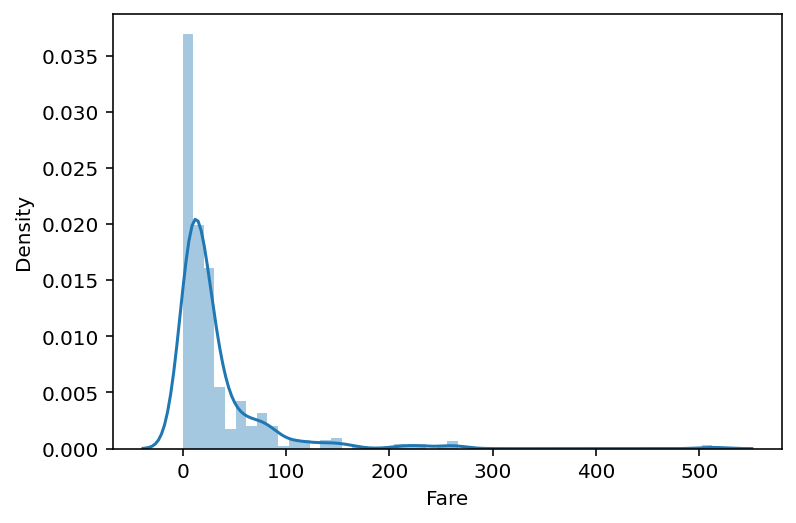

In [14]:
sns.distplot(titanic['Fare'])

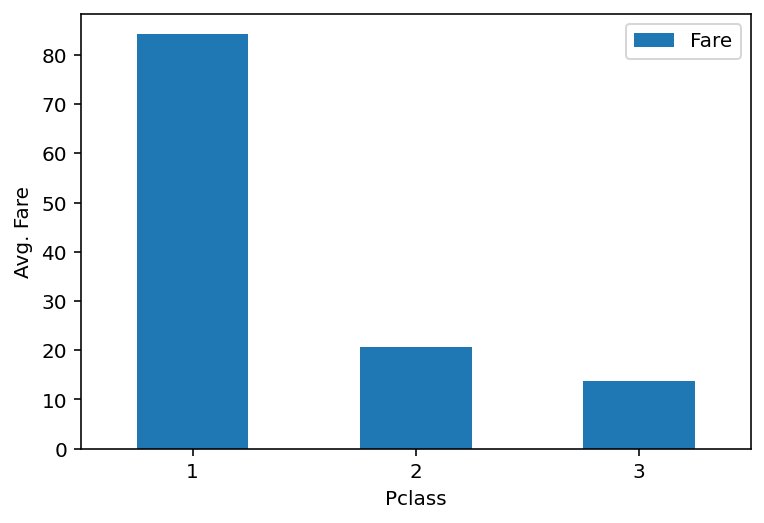

In [15]:
class_fare = titanic.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

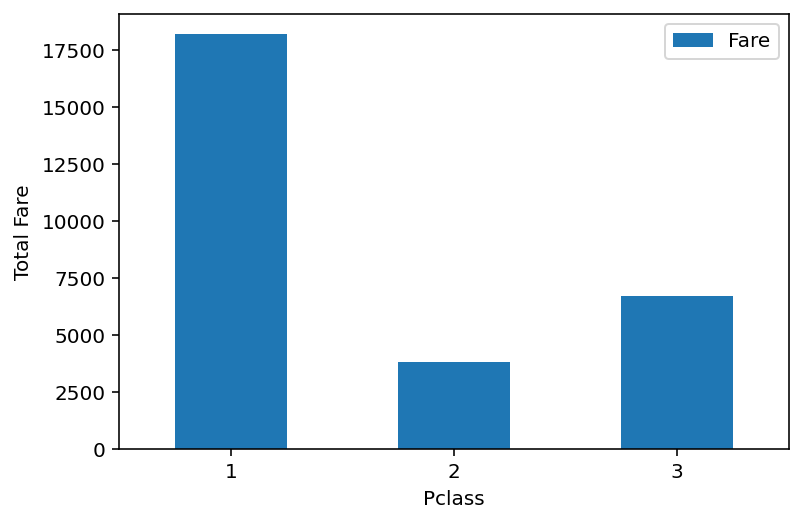

In [16]:
class_fare = titanic.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

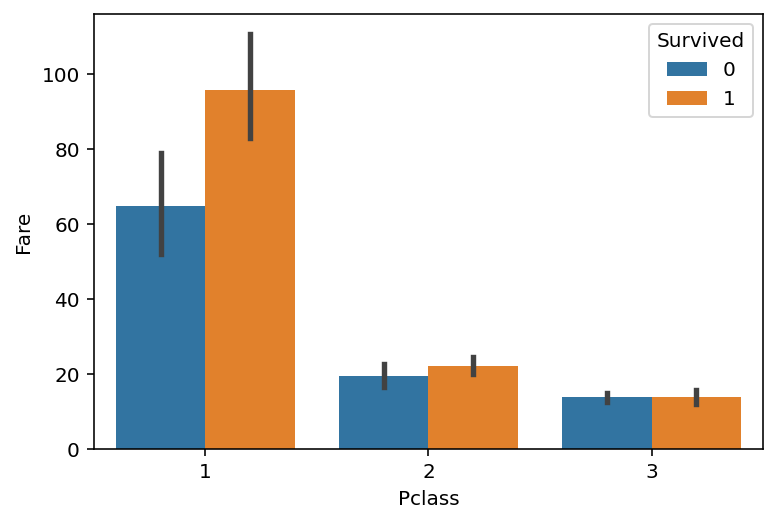

In [17]:
sns.barplot(data=titanic, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

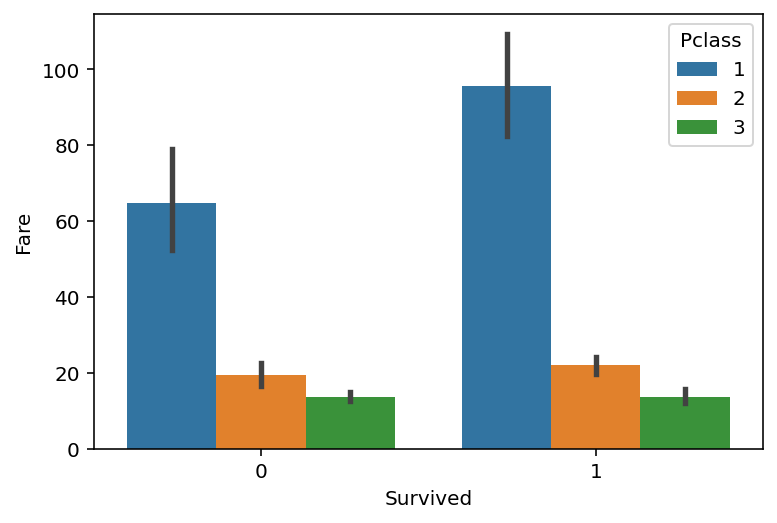

In [18]:
sns.barplot(data=titanic, x='Survived', y='Fare', hue='Pclass')

In [19]:
print("Count of the missing values")
print(30 * "-")
print(titanic.isna().sum())
print(30 * "-")
print("Total missing values are:", titanic.isna().sum().sum())
print(30 * "-")

Count of the missing values
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Total missing values are: 866
------------------------------


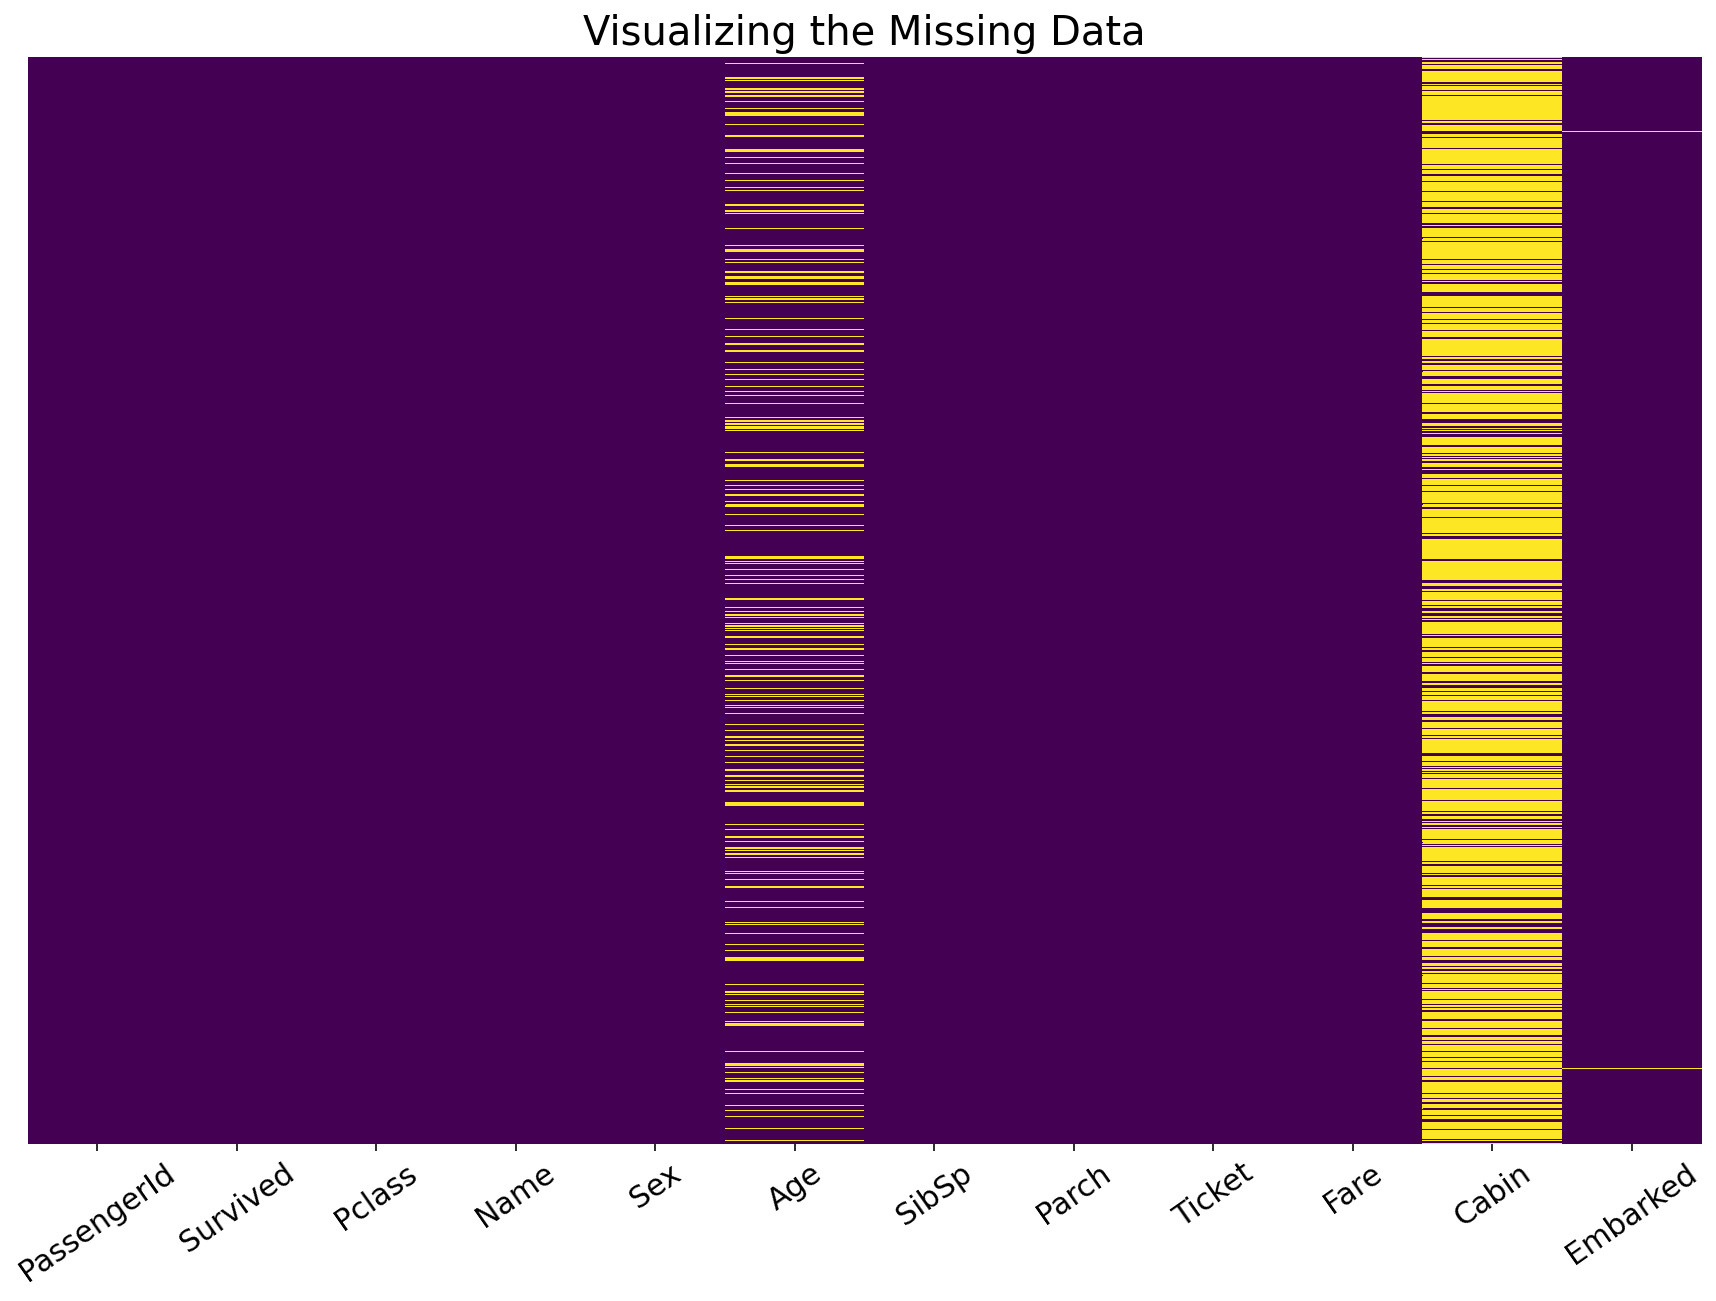

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(titanic.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

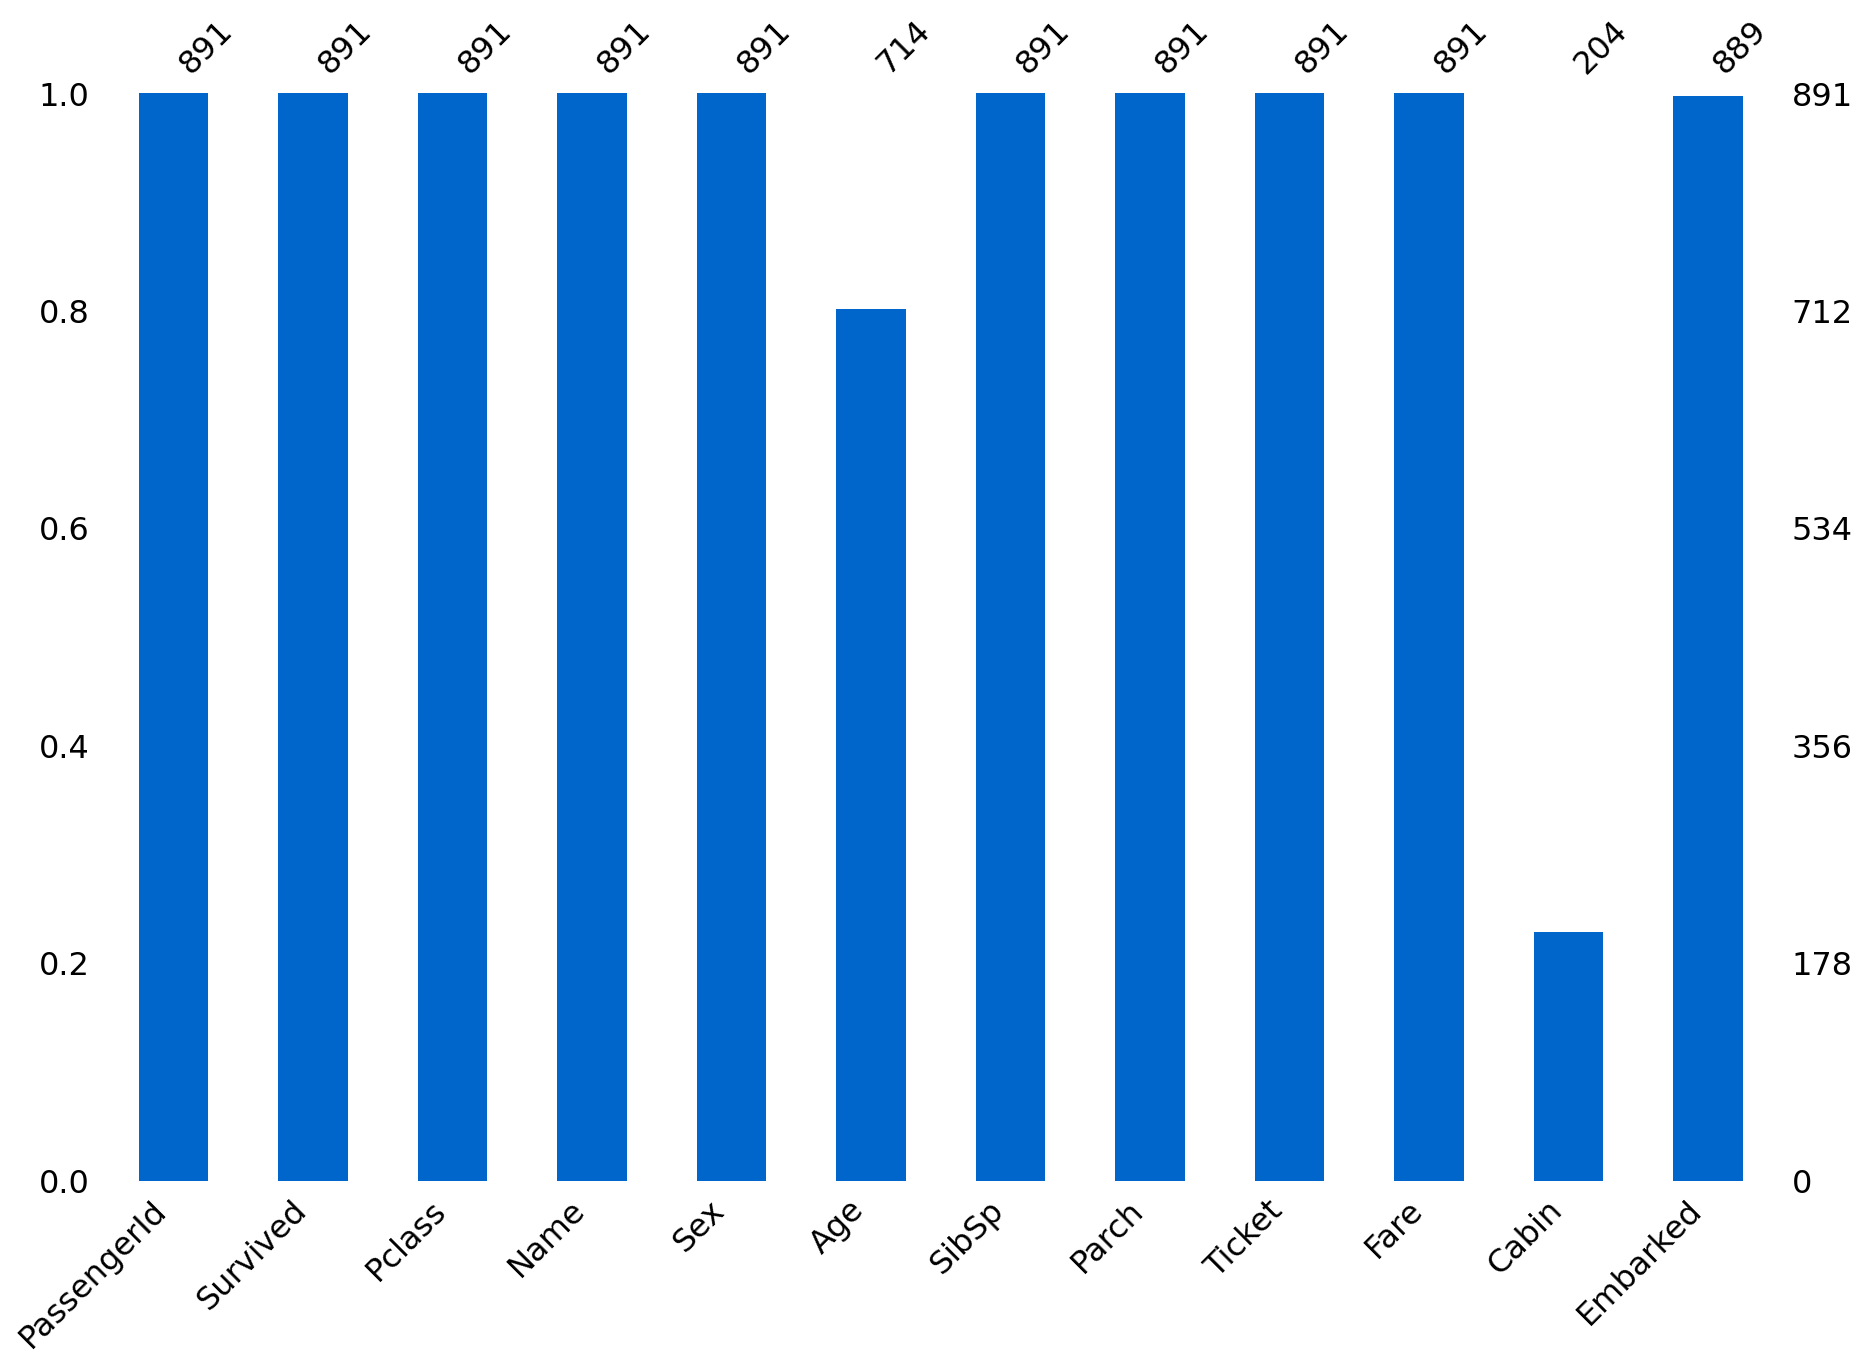

In [21]:
msno.bar(titanic, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

In [22]:
print("Missing Data in the Cabin column =", (titanic['Cabin'].isna().sum() / len(titanic['Cabin']) * 100), "%")

Missing Data in the Cabin column = 77.10437710437711 %


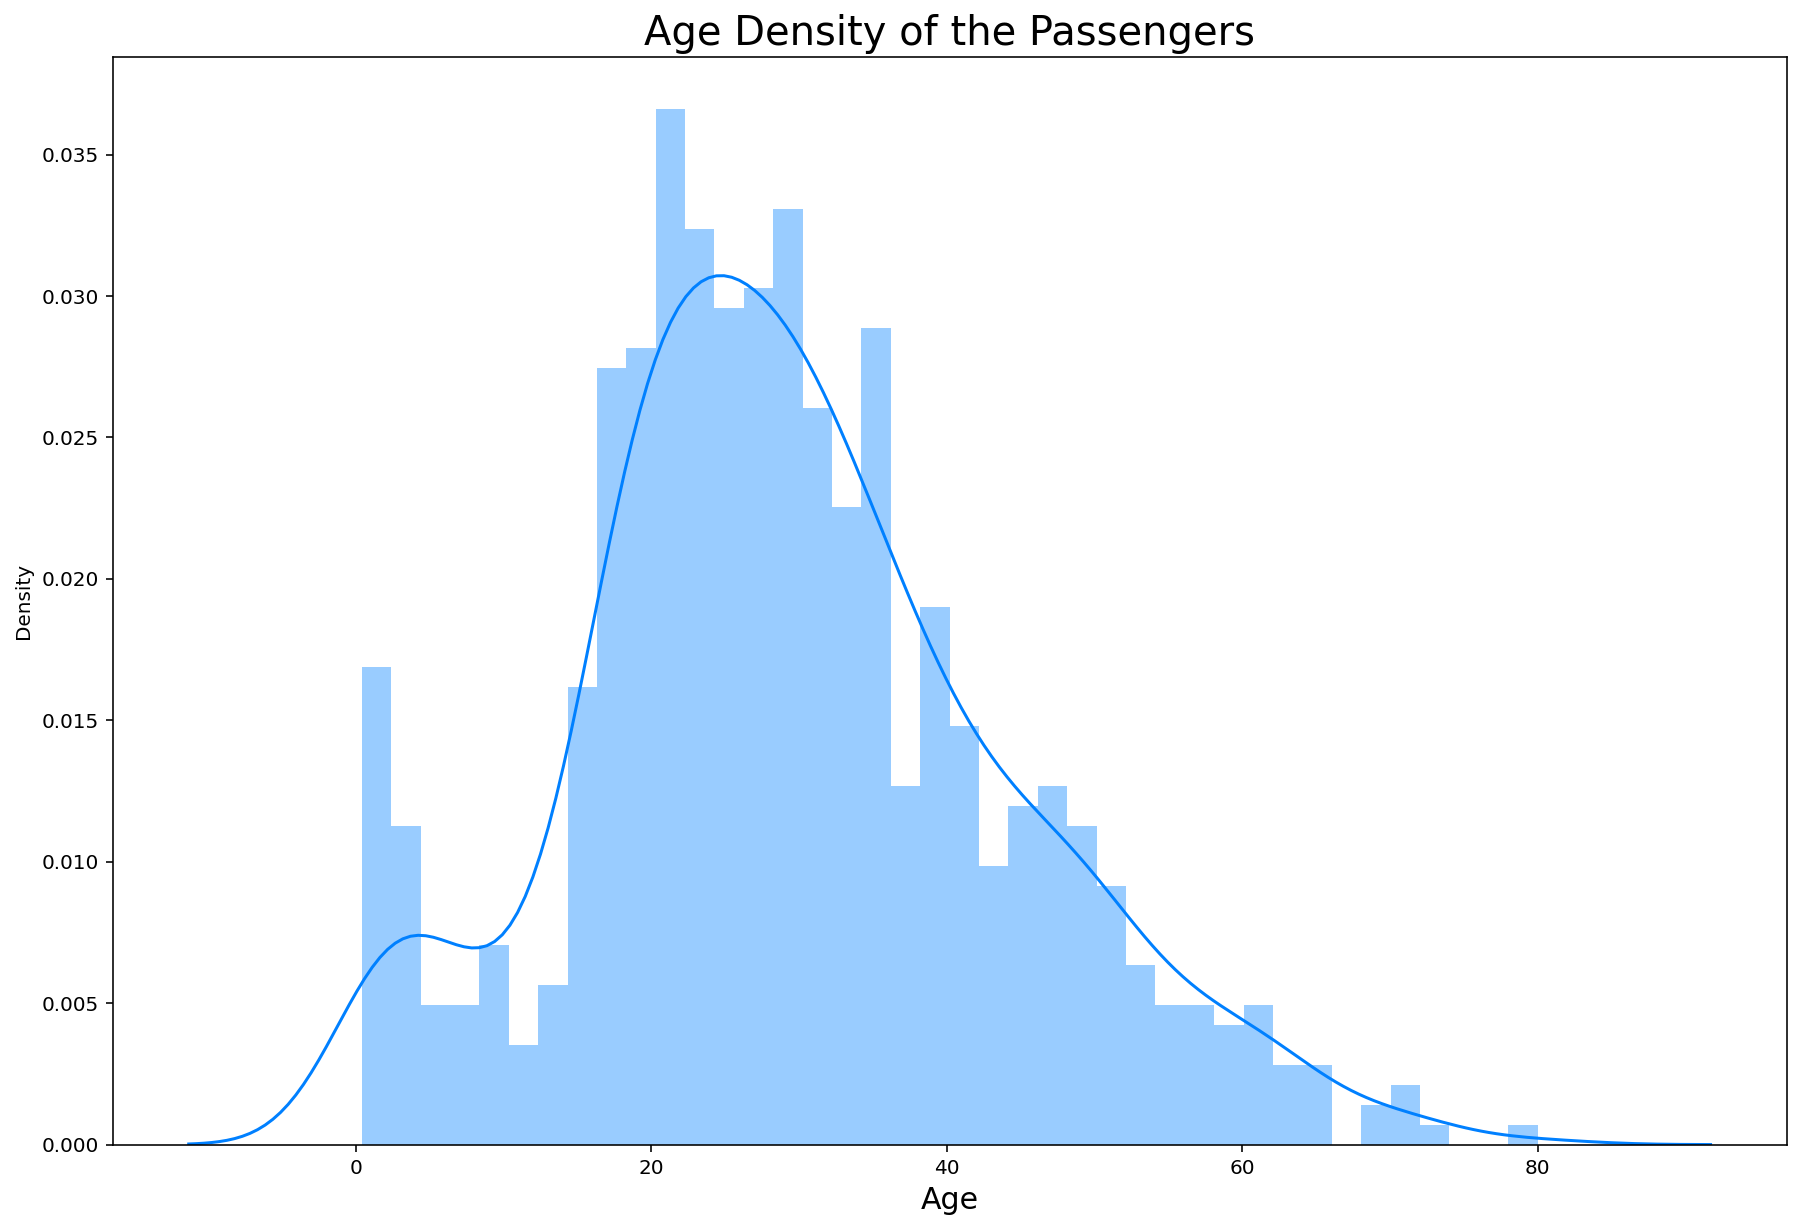

In [27]:
plt.figure(figsize = (15, 10))
sns.distplot(titanic['Age'].dropna(), color = (0, 0.5, 1), bins = 40, kde = True)
plt.title('Age Density of the Passengers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.show()

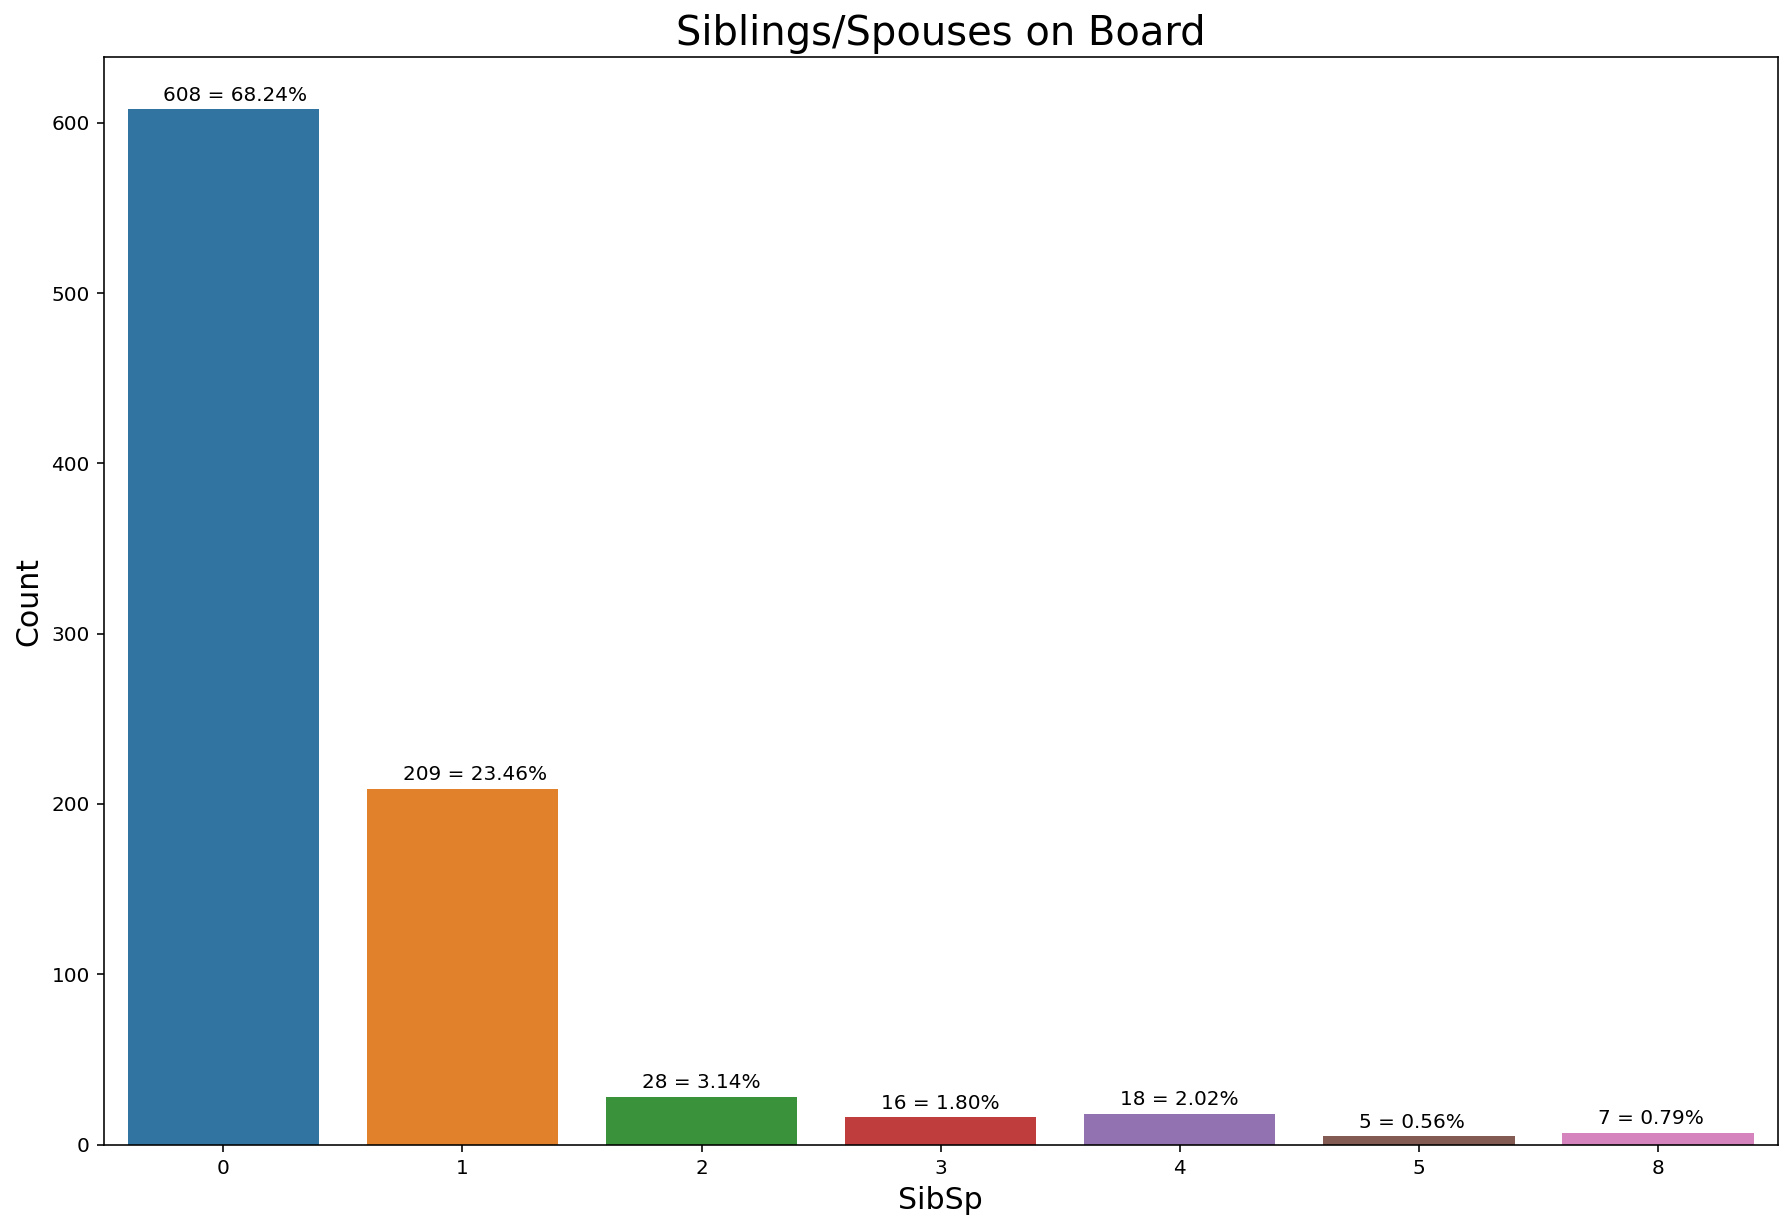

In [32]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'SibSp', data = titanic)
plt.title('Siblings/Spouses on Board', fontsize = 20)
plt.xlabel('SibSp', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(titanic['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

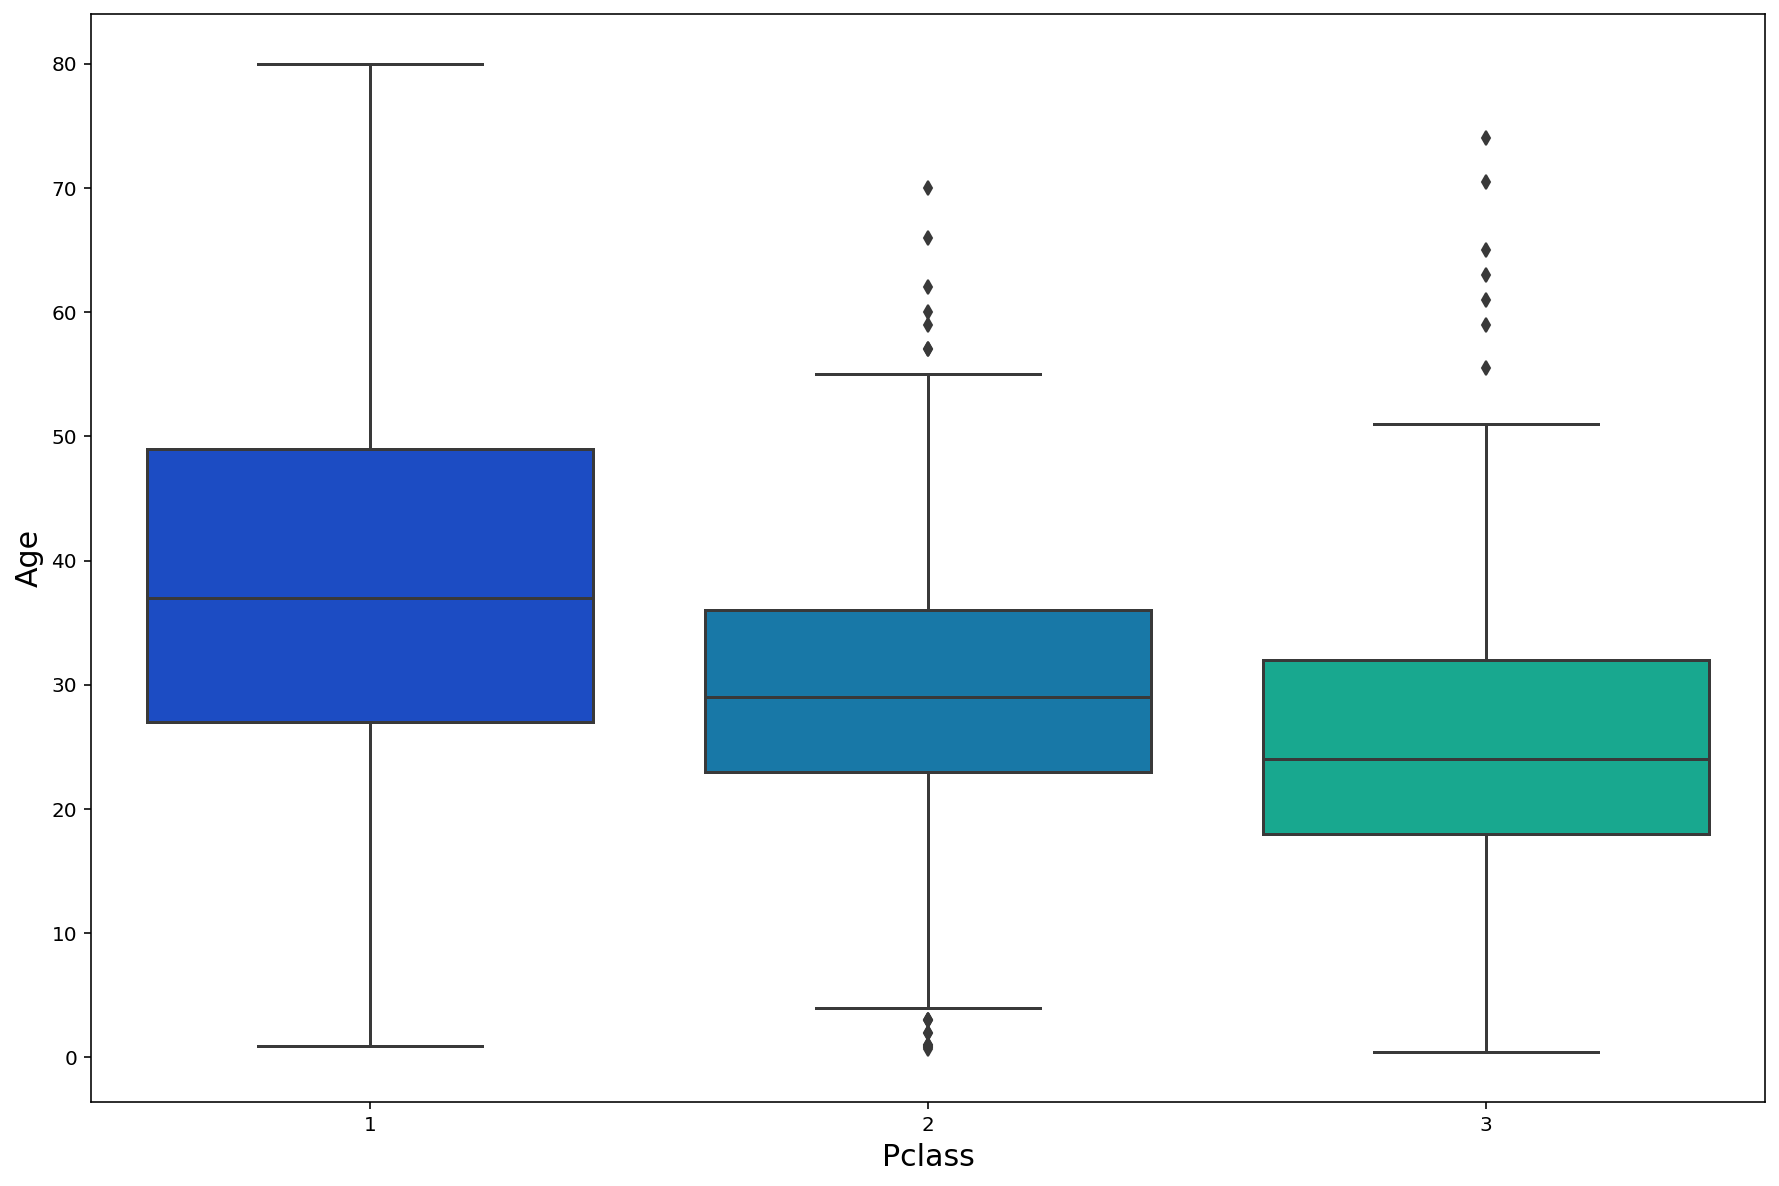

In [35]:
plt.figure(figsize = (15, 10))
bp = sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette = 'winter')
plt.xlabel('Pclass', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

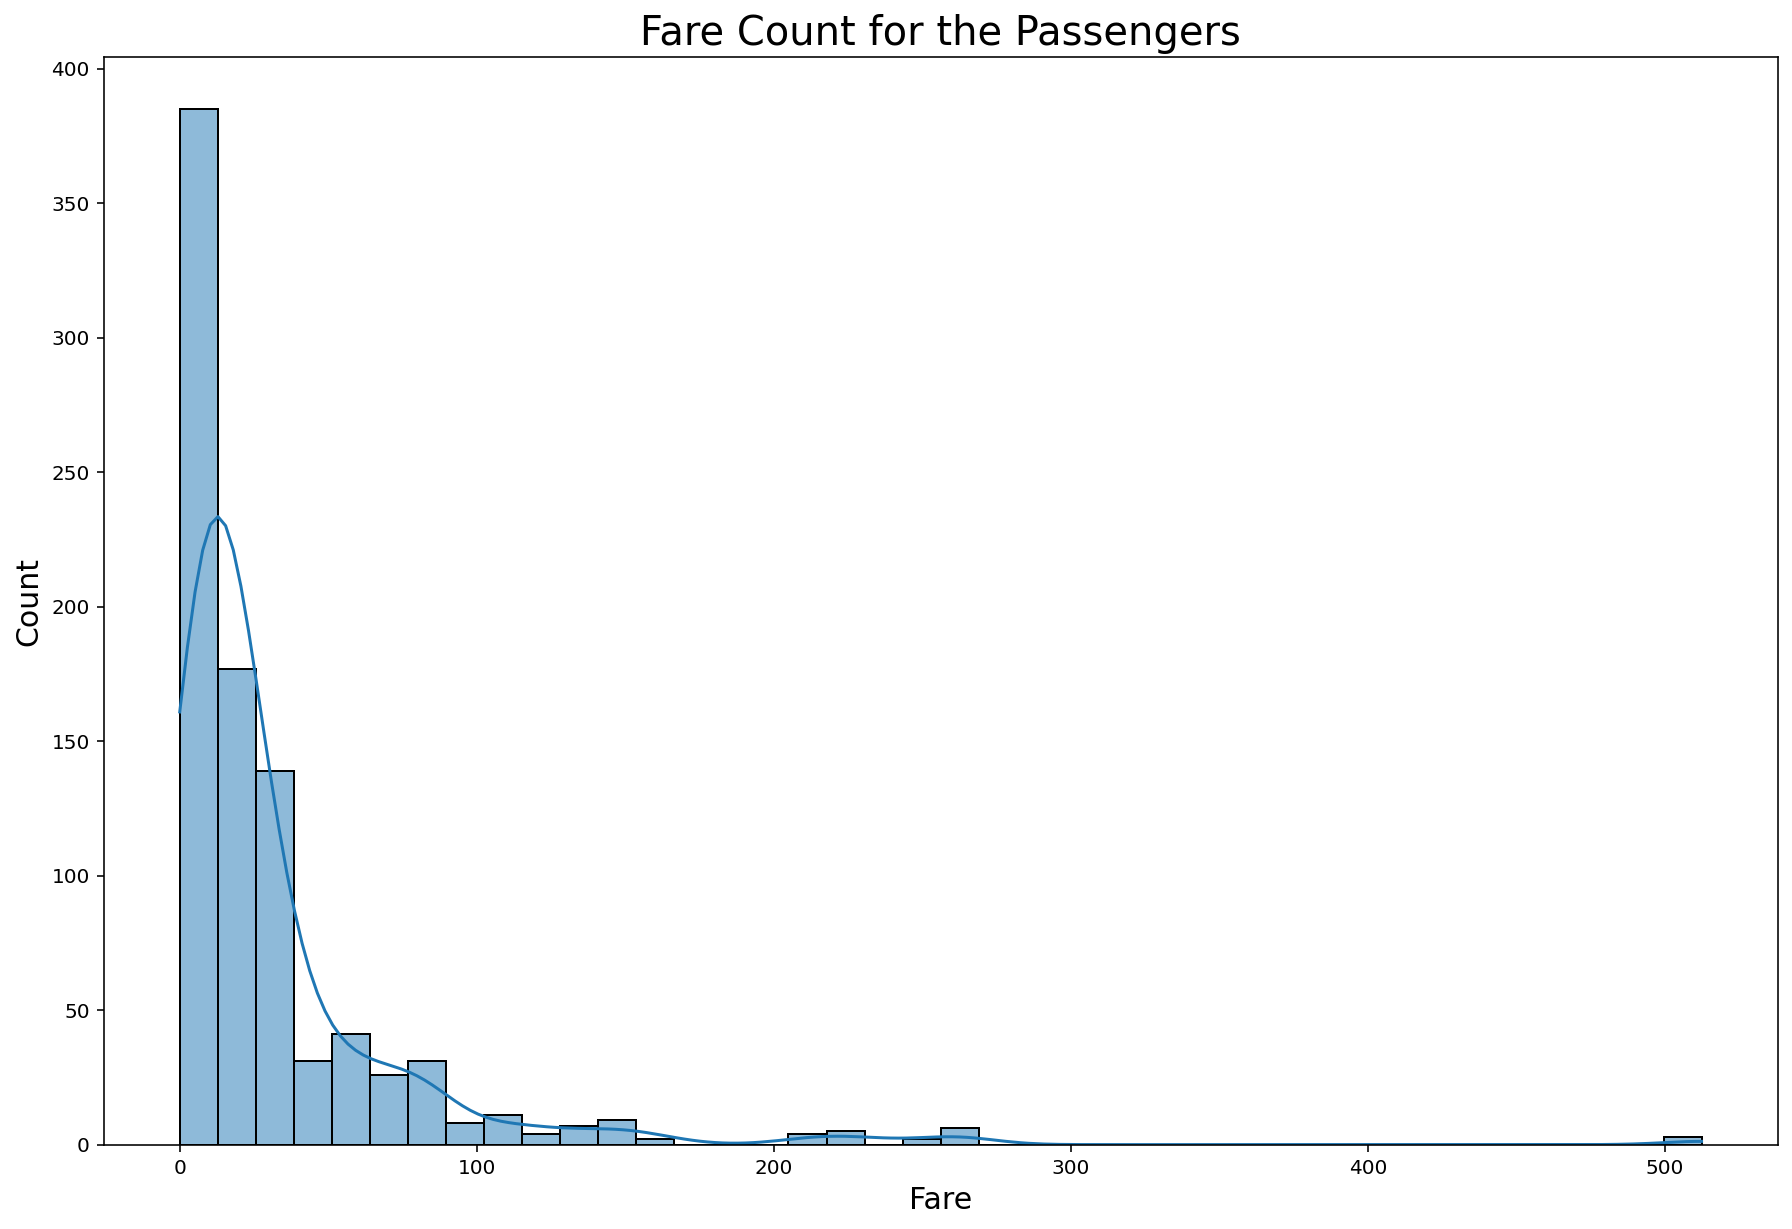

In [34]:
plt.figure(figsize = (15, 10))
sns.histplot(titanic['Fare'], bins = 40, kde = True)
plt.title('Fare Count for the Passengers', fontsize = 20)
plt.xlabel('Fare', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

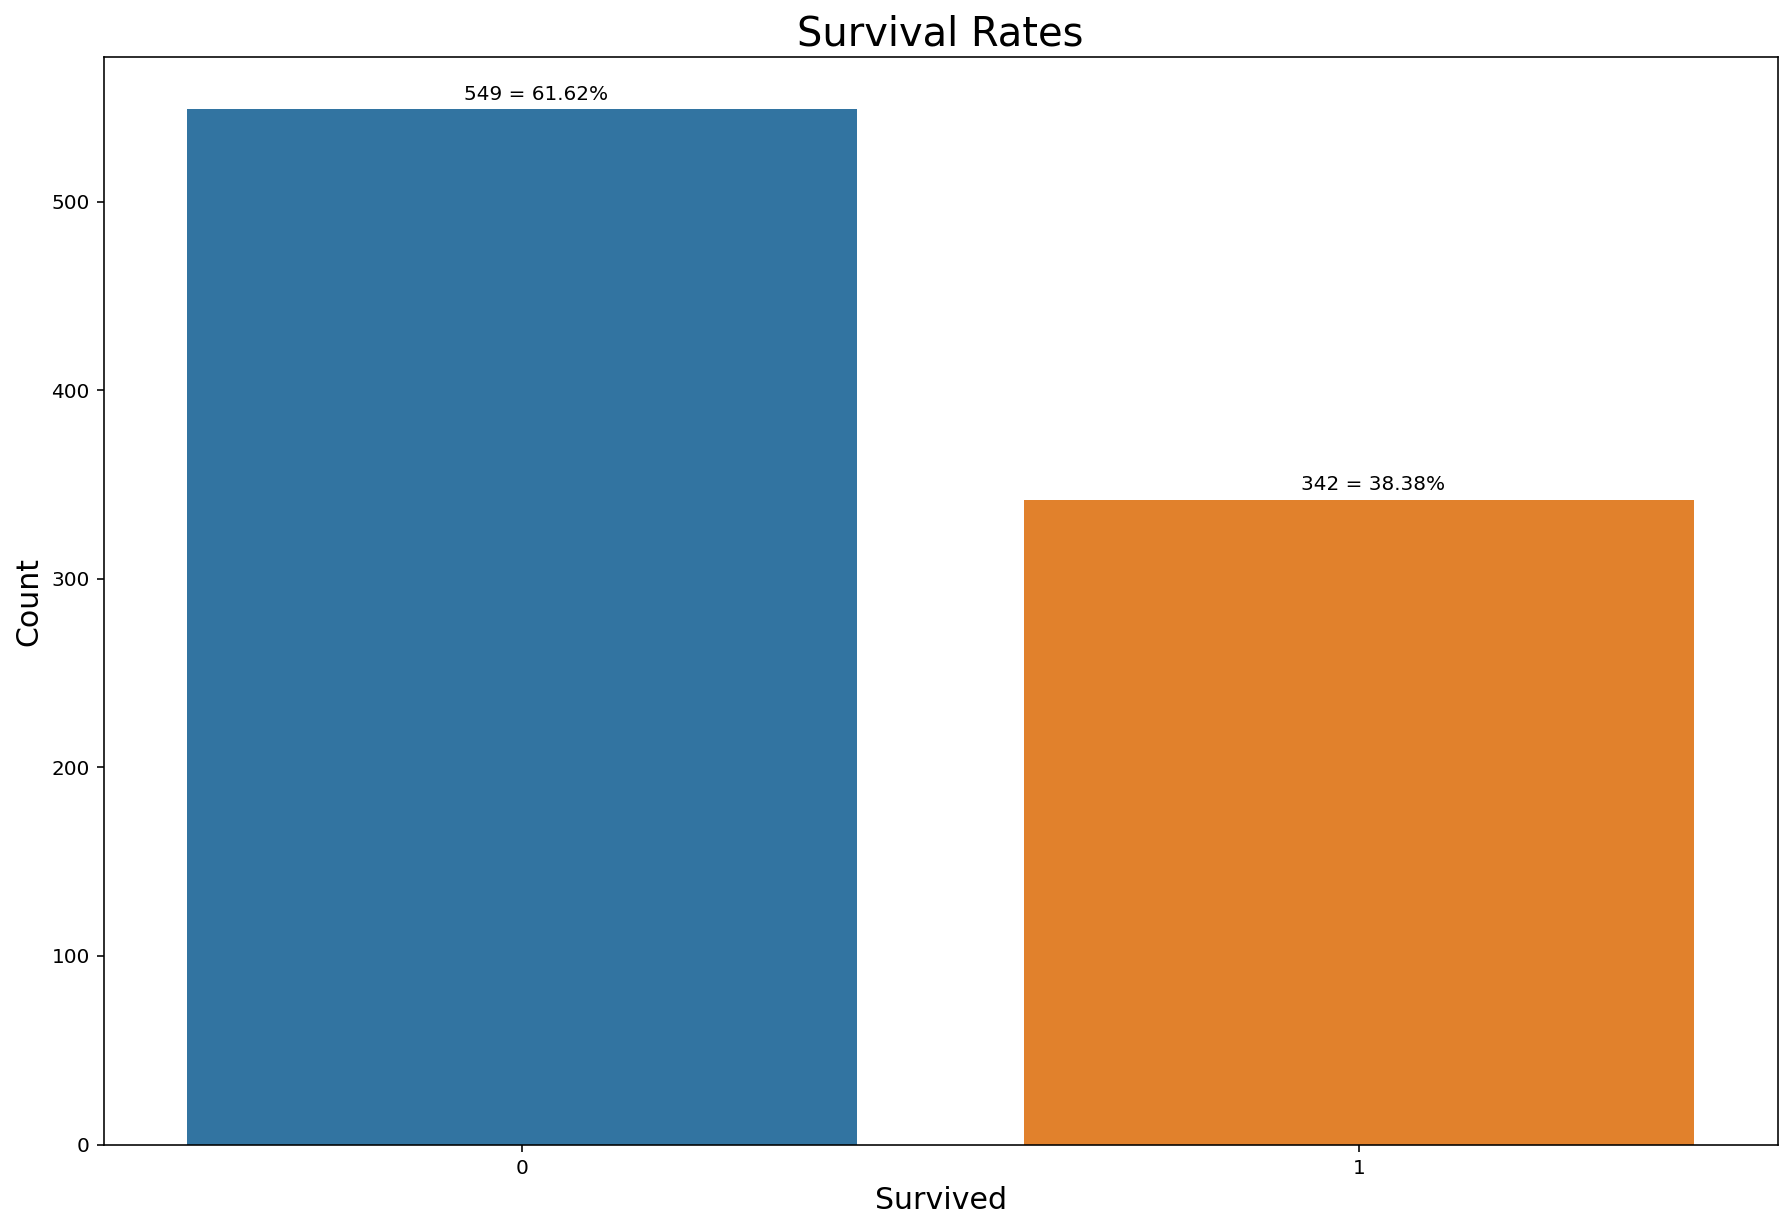

In [23]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', data = titanic)
plt.title('Survival Rates', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(titanic['Survived'])) * 100), (p.get_x() + 0.33, p.get_height() + 5))
plt.show()

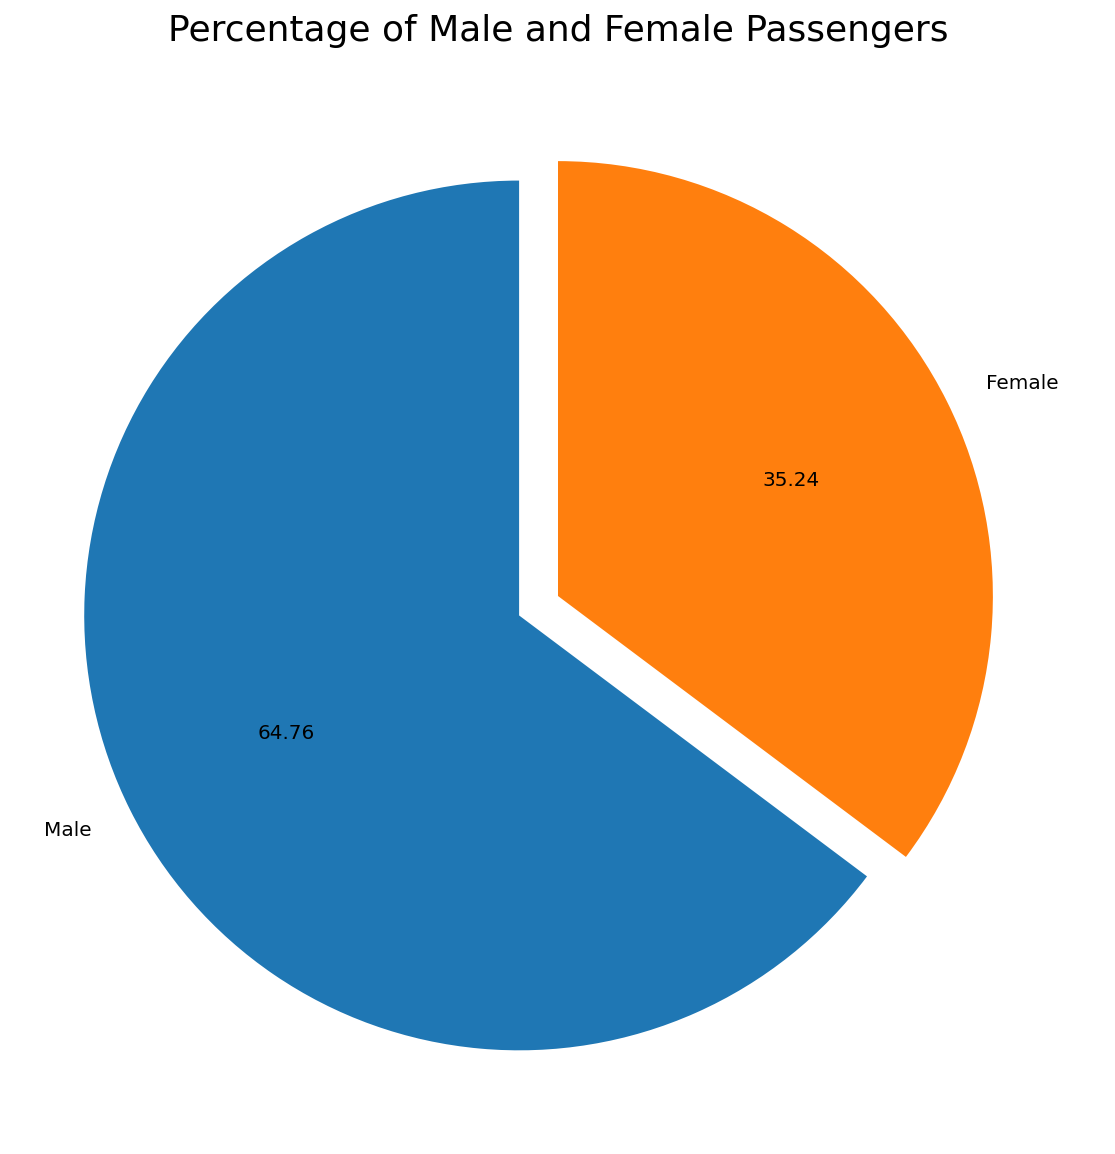

In [24]:
plt.figure(figsize = (15, 10))
plt.pie([(titanic.Sex == 'male').sum(), (titanic.Sex == 'female').sum()], labels = ["Male", "Female"], autopct = "%.2f", startangle = 90, explode = (0.1, 0.0))
plt.title('Percentage of Male and Female Passengers', fontsize = 18)
plt.show()

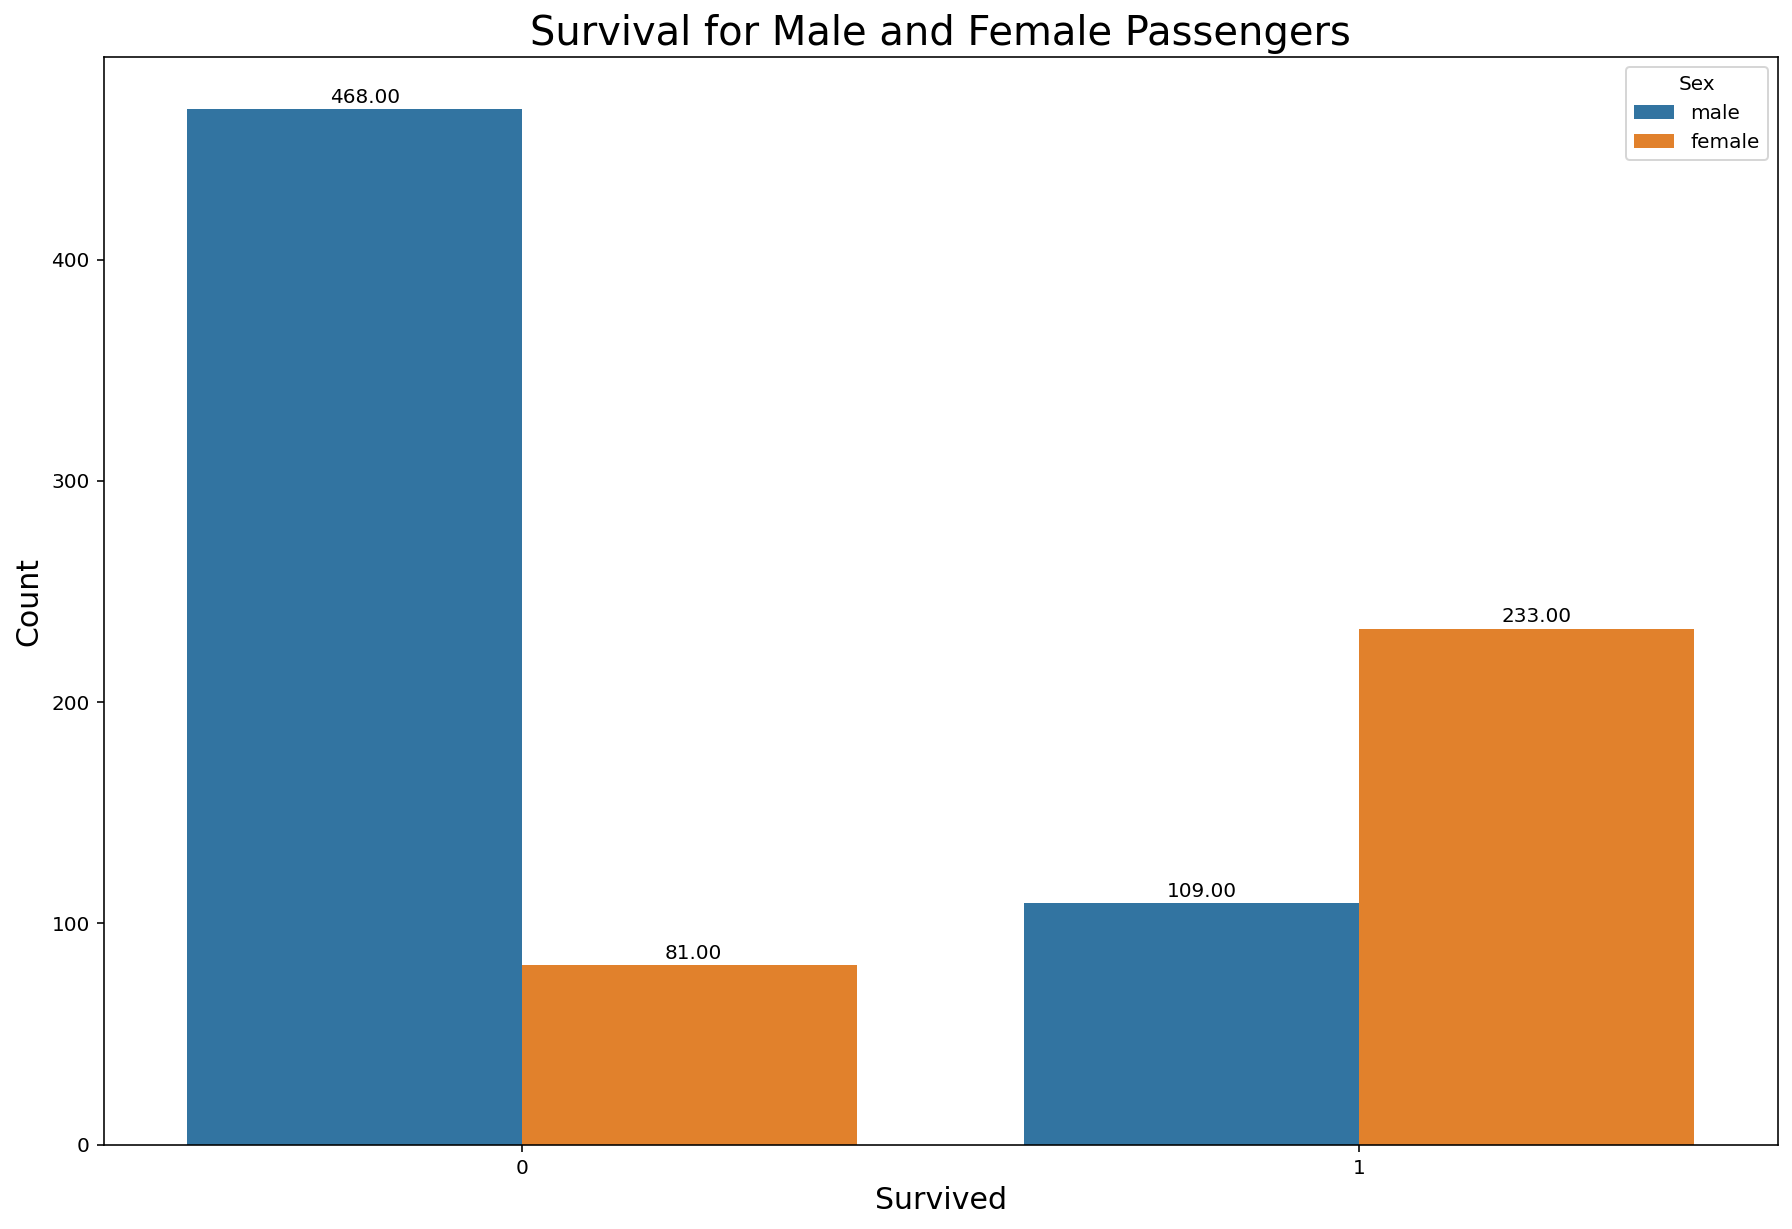

In [25]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)
plt.title('Survival for Male and Female Passengers', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

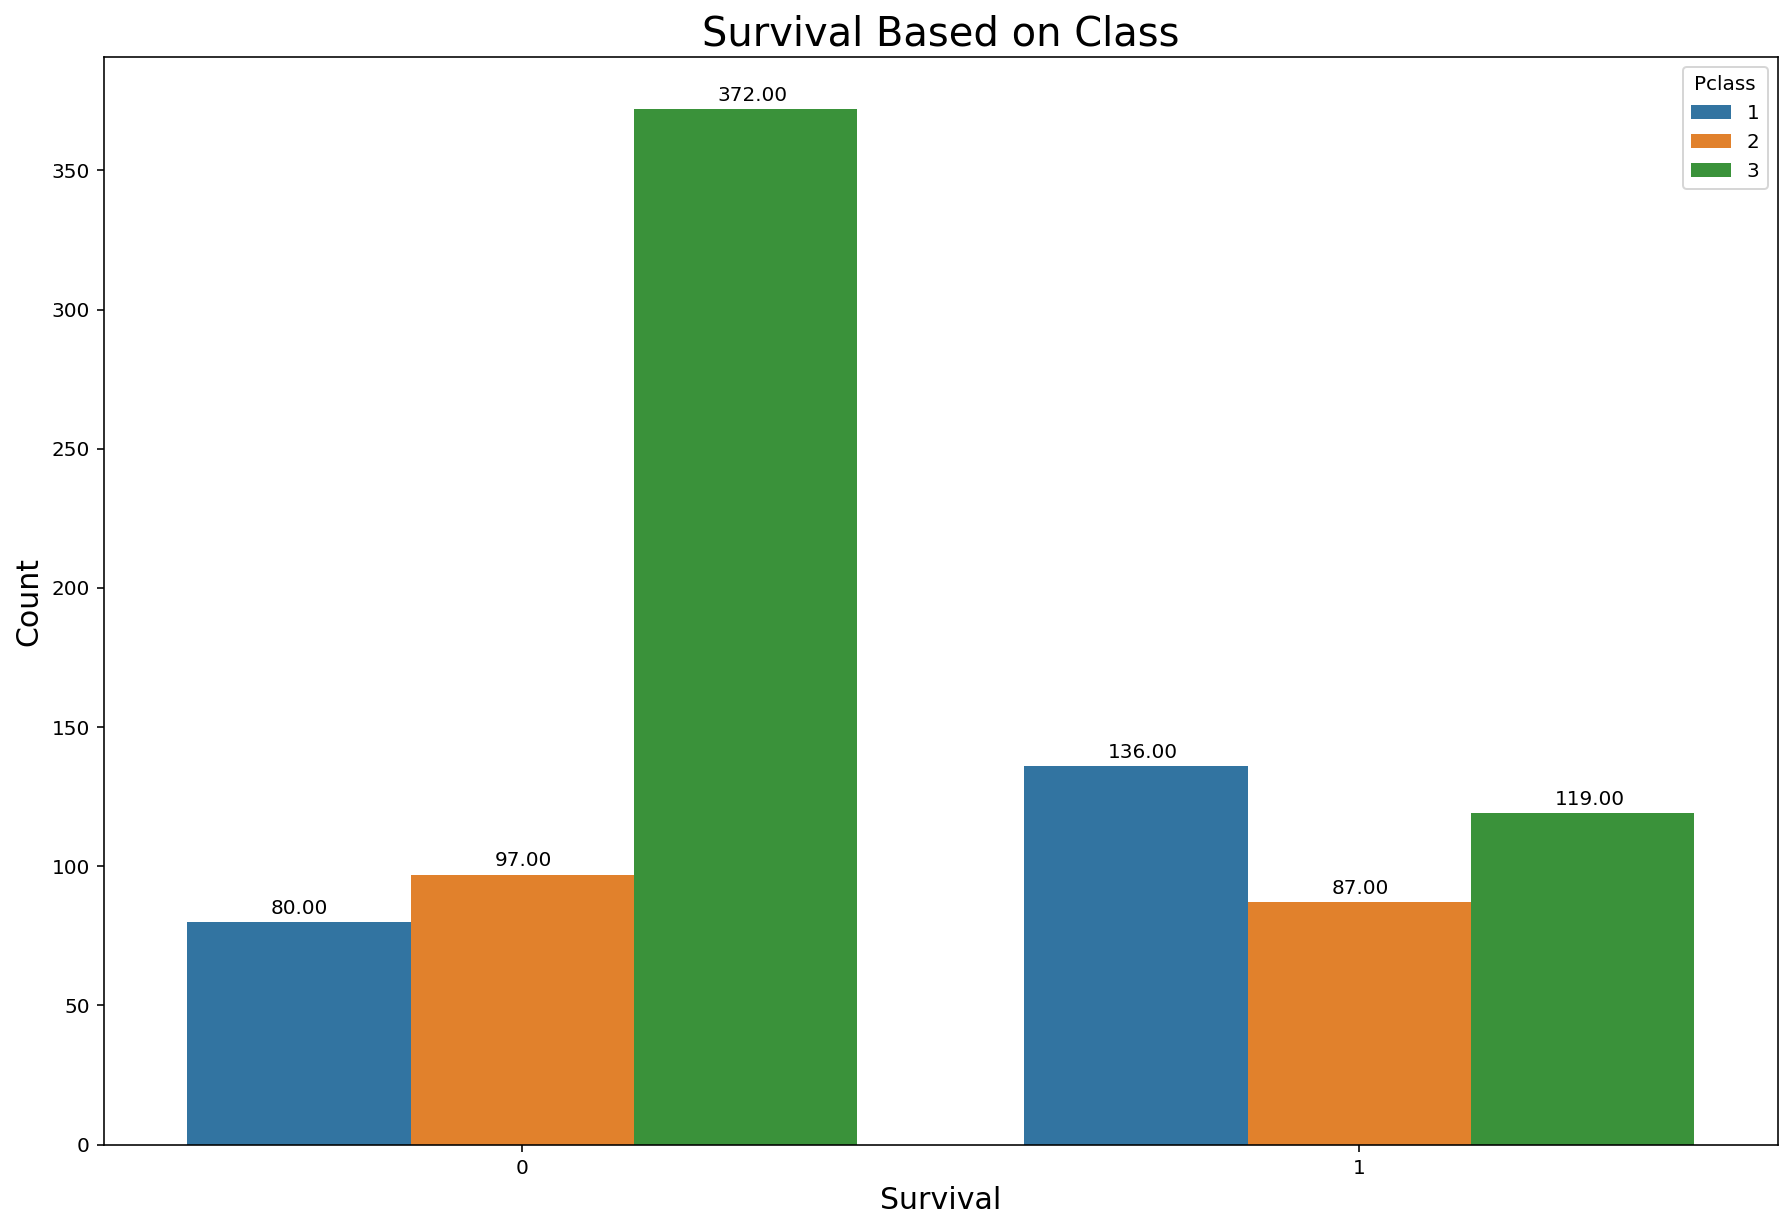

In [26]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)
plt.title('Survival Based on Class', fontsize = 20)
plt.xlabel('Survival', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 3))
plt.show()

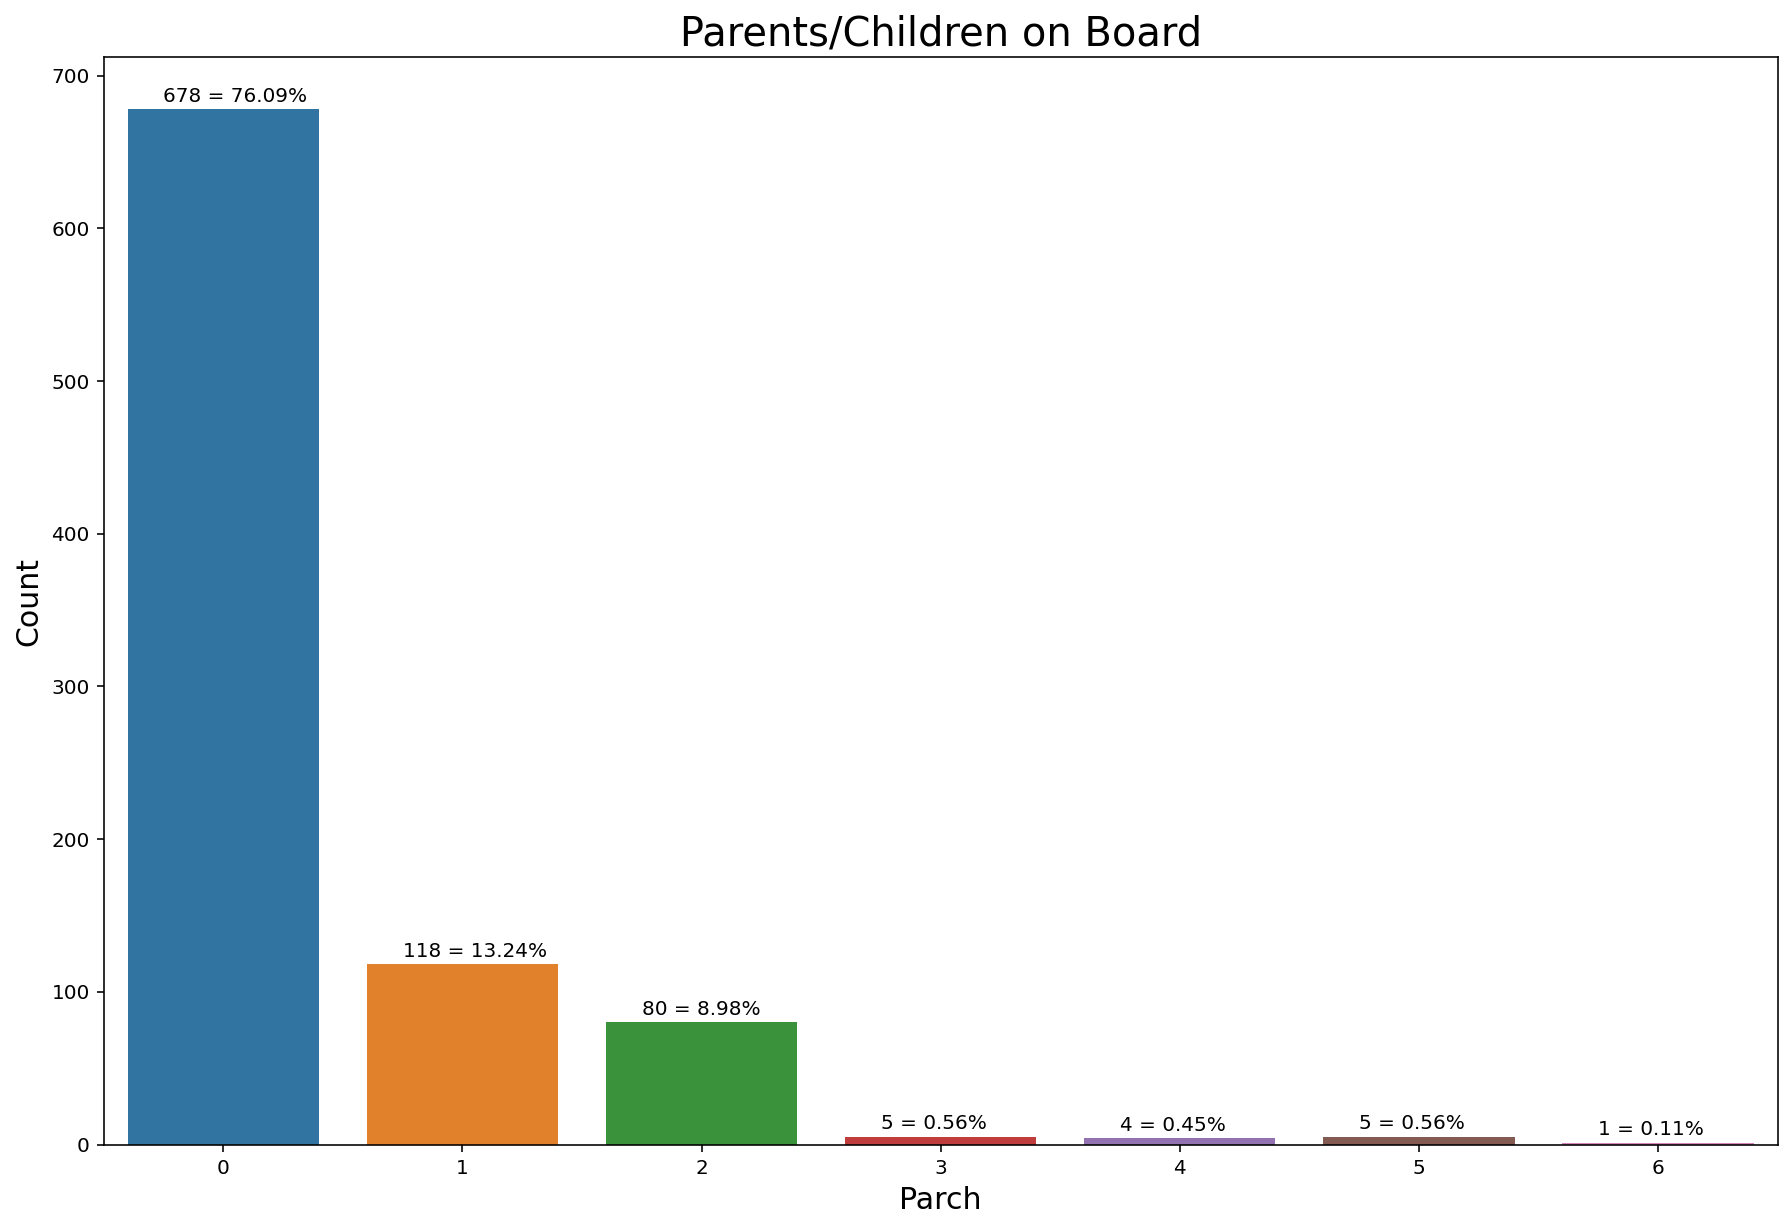

In [33]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Parch', data = titanic)
plt.title('Parents/Children on Board', fontsize = 20)
plt.xlabel('Parch', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(titanic['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()